In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import models, layers, callbacks
from my_modules.import_datasets import process_dataset
from my_modules.model_evaluator import modeler
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
import numpy as np
import random
%load_ext autoreload
%autoreload 2

# Set the random seeds for reproducibility
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

early_stopping = callbacks.EarlyStopping(monitor='val_loss', 
                               min_delta=0.001, 
                               patience=10, 
                               mode='min', 
                               restore_best_weights=True,
                               verbose=1)

In [2]:
# Load datasets using image_dataset_from_directory
train_ds = image_dataset_from_directory(
    directory='data/chest_xray/new_train',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    image_size=(224, 224))

val_ds = image_dataset_from_directory(
    directory='data/chest_xray/new_val',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    image_size=(224, 224))

train_ds_res = process_dataset(train_ds)
val_ds_res = process_dataset(val_ds)

Found 4684 files belonging to 2 classes.
Found 585 files belonging to 2 classes.


Epoch 1/10
147/147 [==============================] - 56s 162ms/step - loss: 0.5667 - auc: 0.6390 - recall: 0.9991 - accuracy: 0.7312 - val_loss: 0.5350 - val_auc: 0.9246 - val_recall: 1.0000 - val_accuracy: 0.7299
Epoch 2/10
147/147 [==============================] - 18s 123ms/step - loss: 0.5066 - auc: 0.8066 - recall: 0.9915 - accuracy: 0.7406 - val_loss: 0.4537 - val_auc: 0.9278 - val_recall: 0.9836 - val_accuracy: 0.7932
Epoch 3/10
147/147 [==============================] - 18s 125ms/step - loss: 0.4533 - auc: 0.8606 - recall: 0.9672 - accuracy: 0.7754 - val_loss: 0.3897 - val_auc: 0.9301 - val_recall: 0.9649 - val_accuracy: 0.8256
Epoch 4/10
147/147 [==============================] - 18s 125ms/step - loss: 0.4137 - auc: 0.8765 - recall: 0.9400 - accuracy: 0.8025 - val_loss: 0.3529 - val_auc: 0.9333 - val_recall: 0.9415 - val_accuracy: 0.8564
Epoch 5/10
147/147 [==============================] - 18s 123ms/step - loss: 0.3963 - auc: 0.8793 - recall: 0.9289 - accuracy: 0.8104 - val_

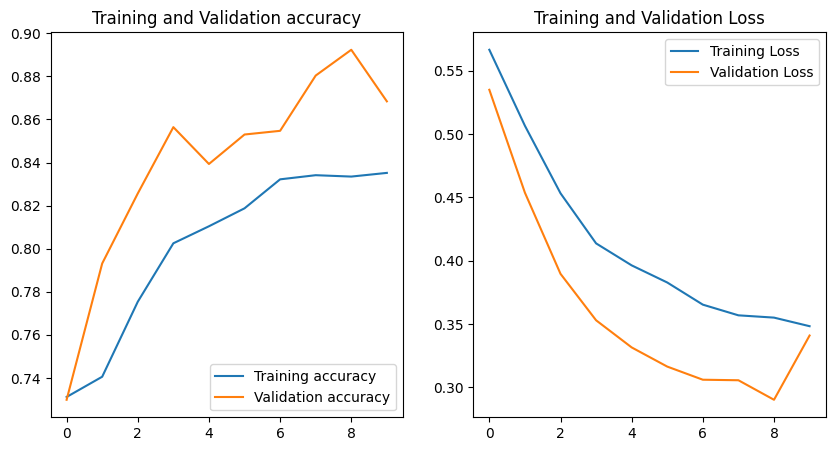

,loss,auc,recall,accuracy
Train,0.403580,0.912146,0.791984,0.822588
Val,0.340899,0.945617,0.850117,0.868376
Diff,-0.062681,0.033471,0.058133,0.045789


------------------------------



In [3]:
# Load the ResNet50 model with pretrained weights, but without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Make sure the base model's layers are not trainable
for layer in base_model.layers:
    layer.trainable = False

# Create a new Sequential model
resnet_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

resnet_results, resnet_model = modeler(
    resnet_model, file_name = 'resnet_model', file_path= 'saved_models/', optimizer = 'adam',
    train=train_ds_res, val=val_ds_res, num_epochs=10, early_stopping = early_stopping)

Epoch 1/10
147/147 [==============================] - 28s 144ms/step - loss: 0.5418 - auc: 0.7201 - recall: 0.9688 - accuracy: 0.7519 - val_loss: 0.4319 - val_auc: 0.9308 - val_recall: 0.9696 - val_accuracy: 0.8085
Epoch 2/10
147/147 [==============================] - 18s 124ms/step - loss: 0.4320 - auc: 0.8602 - recall: 0.9435 - accuracy: 0.7908 - val_loss: 0.3447 - val_auc: 0.9356 - val_recall: 0.9625 - val_accuracy: 0.8256
Epoch 3/10
147/147 [==============================] - 18s 122ms/step - loss: 0.4031 - auc: 0.8708 - recall: 0.9195 - accuracy: 0.8145 - val_loss: 0.3144 - val_auc: 0.9402 - val_recall: 0.9461 - val_accuracy: 0.8530
Epoch 4/10
147/147 [==============================] - 18s 122ms/step - loss: 0.3732 - auc: 0.8918 - recall: 0.9190 - accuracy: 0.8303 - val_loss: 0.3758 - val_auc: 0.9450 - val_recall: 0.9859 - val_accuracy: 0.8051
Epoch 5/10
147/147 [==============================] - 19s 127ms/step - loss: 0.3597 - auc: 0.8990 - recall: 0.9143 - accuracy: 0.8350 - val_

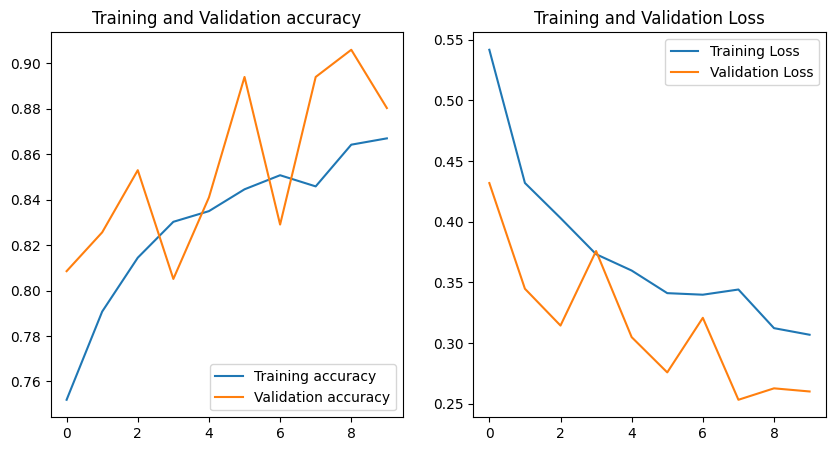

,loss,auc,recall,accuracy
Train,0.295975,0.944154,0.961673,0.862938
Val,0.260017,0.965449,0.971897,0.880342
Diff,-0.035958,0.021295,0.010223,0.017404


------------------------------



In [4]:
# Load the ResNet50 model with pretrained weights, but without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Make sure the base model's layers are not trainable
for layer in base_model.layers:
    layer.trainable = False

# Create a new Sequential model
resnet_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

resnet_results, resnet_model = modeler(
    resnet_model, file_name = 'resnet_model', file_path= 'saved_models/', optimizer = 'adam',
    train=train_ds_res, val=val_ds_res, num_epochs=10, early_stopping = early_stopping)

Epoch 1/10
147/147 [==============================] - 28s 143ms/step - loss: 0.5191 - auc: 0.7693 - recall: 0.9441 - accuracy: 0.7715 - val_loss: 0.3664 - val_auc: 0.9335 - val_recall: 0.9368 - val_accuracy: 0.8701
Epoch 2/10
147/147 [==============================] - 18s 124ms/step - loss: 0.4012 - auc: 0.8695 - recall: 0.9251 - accuracy: 0.8213 - val_loss: 0.3299 - val_auc: 0.9421 - val_recall: 0.9016 - val_accuracy: 0.8855
Epoch 3/10
147/147 [==============================] - 18s 123ms/step - loss: 0.4024 - auc: 0.8654 - recall: 0.9116 - accuracy: 0.8158 - val_loss: 0.3669 - val_auc: 0.9477 - val_recall: 0.9836 - val_accuracy: 0.8017
Epoch 4/10
147/147 [==============================] - 18s 123ms/step - loss: 0.3711 - auc: 0.8888 - recall: 0.9157 - accuracy: 0.8305 - val_loss: 0.3019 - val_auc: 0.9526 - val_recall: 0.9742 - val_accuracy: 0.8444
Epoch 5/10
147/147 [==============================] - 18s 123ms/step - loss: 0.3344 - auc: 0.9139 - recall: 0.9193 - accuracy: 0.8478 - val_

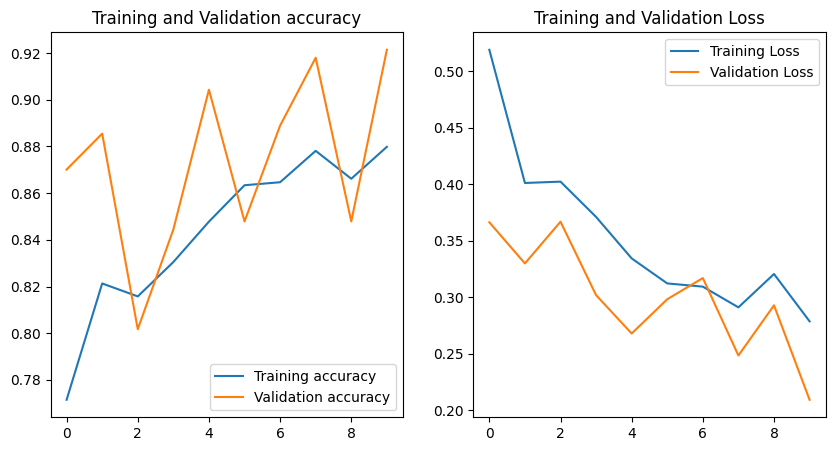

,loss,auc,recall,accuracy
Train,0.249600,0.958014,0.919544,0.905636
Val,0.209219,0.973364,0.927400,0.921368
Diff,-0.040380,0.015350,0.007857,0.015731


------------------------------



In [5]:
# Load the ResNet50 model with pretrained weights, but without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Make sure the base model's layers are not trainable
for layer in base_model.layers:
    layer.trainable = False

# Create a new Sequential model
resnet_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

resnet_results, resnet_model = modeler(
    resnet_model, file_name = 'resnet_model', file_path= 'saved_models/', optimizer = 'adam',
    train=train_ds_res, val=val_ds_res, num_epochs=10, early_stopping = early_stopping)

Epoch 1/10
147/147 [==============================] - 29s 143ms/step - loss: 0.5762 - auc: 0.6567 - recall: 0.9919 - accuracy: 0.7510 - val_loss: 0.5442 - val_auc: 0.9283 - val_recall: 1.0000 - val_accuracy: 0.7299
Epoch 2/10
147/147 [==============================] - 18s 124ms/step - loss: 0.5339 - auc: 0.7752 - recall: 0.9985 - accuracy: 0.7316 - val_loss: 0.5020 - val_auc: 0.9293 - val_recall: 1.0000 - val_accuracy: 0.7316
Epoch 3/10
147/147 [==============================] - 18s 123ms/step - loss: 0.5036 - auc: 0.8394 - recall: 0.9950 - accuracy: 0.7363 - val_loss: 0.4686 - val_auc: 0.9301 - val_recall: 0.9953 - val_accuracy: 0.7607
Epoch 4/10
147/147 [==============================] - 18s 124ms/step - loss: 0.4792 - auc: 0.8700 - recall: 0.9854 - accuracy: 0.7466 - val_loss: 0.4553 - val_auc: 0.9308 - val_recall: 0.9953 - val_accuracy: 0.7402
Epoch 5/10
147/147 [==============================] - 18s 124ms/step - loss: 0.4617 - auc: 0.8744 - recall: 0.9766 - accuracy: 0.7622 - val_

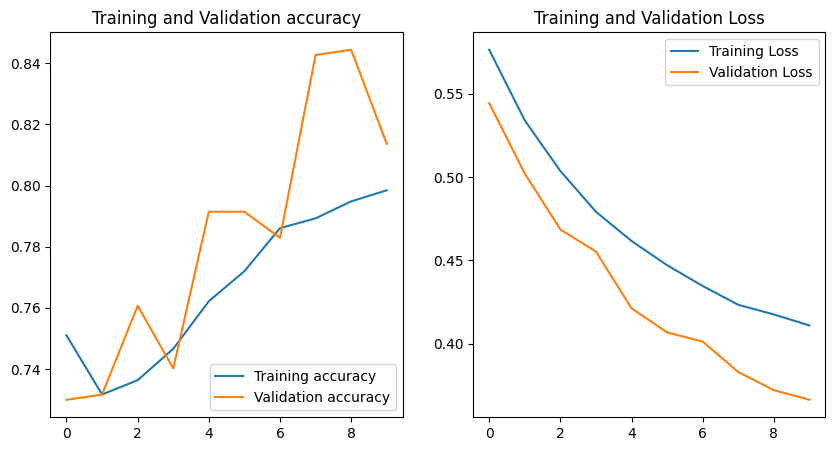

,loss,auc,recall,accuracy
Train,0.405089,0.896097,0.954359,0.795260
Val,0.366542,0.935634,0.974239,0.813675
Diff,-0.038546,0.039537,0.019880,0.018415


------------------------------



In [6]:
# Load the ResNet50 model with pretrained weights, but without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Make sure the base model's layers are not trainable
for layer in base_model.layers:
    layer.trainable = False

# Create a new Sequential model
resnet_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')
])

resnet_results, resnet_model = modeler(
    resnet_model, file_name = 'resnet_model', file_path= 'saved_models/', optimizer = 'adam',
    train=train_ds_res, val=val_ds_res, num_epochs=10, early_stopping = early_stopping)

Epoch 1/50
147/147 [==============================] - 29s 147ms/step - loss: 0.5329 - auc: 0.7376 - recall: 0.9745 - accuracy: 0.7493 - val_loss: 0.4642 - val_auc: 0.9300 - val_recall: 0.9977 - val_accuracy: 0.7385
Epoch 2/50
147/147 [==============================] - 18s 125ms/step - loss: 0.4261 - auc: 0.8629 - recall: 0.9400 - accuracy: 0.7938 - val_loss: 0.3446 - val_auc: 0.9351 - val_recall: 0.9415 - val_accuracy: 0.8547
Epoch 3/50
147/147 [==============================] - 19s 129ms/step - loss: 0.3927 - auc: 0.8790 - recall: 0.9190 - accuracy: 0.8140 - val_loss: 0.3138 - val_auc: 0.9403 - val_recall: 0.9344 - val_accuracy: 0.8803
Epoch 4/50
147/147 [==============================] - 18s 123ms/step - loss: 0.3729 - auc: 0.8905 - recall: 0.9163 - accuracy: 0.8258 - val_loss: 0.2951 - val_auc: 0.9444 - val_recall: 0.9321 - val_accuracy: 0.8923
Epoch 5/50
147/147 [==============================] - 18s 123ms/step - loss: 0.3596 - auc: 0.8978 - recall: 0.9128 - accuracy: 0.8354 - val_

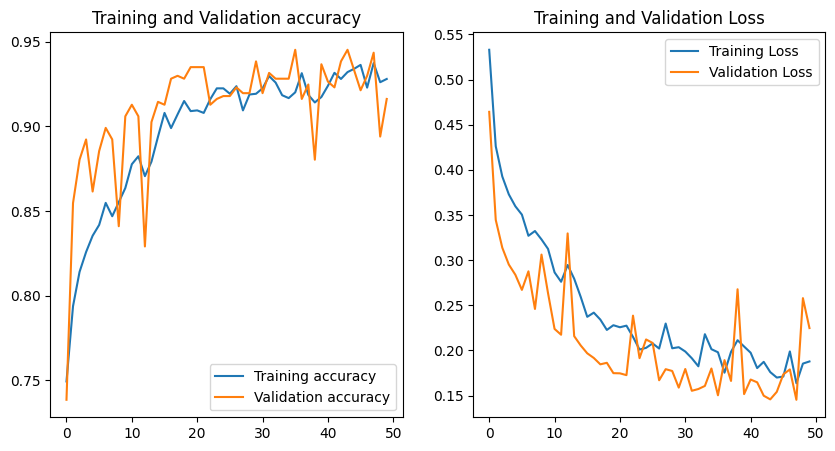

,loss,auc,recall,accuracy
Train,0.237299,0.978378,0.993271,0.905850
Val,0.224804,0.983444,1.000000,0.916239
Diff,-0.012495,0.005065,0.006729,0.010390


------------------------------



In [7]:
# Load the ResNet50 model with pretrained weights, but without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Make sure the base model's layers are not trainable
for layer in base_model.layers:
    layer.trainable = False

# Create a new Sequential model
resnet_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

resnet_results, resnet_model = modeler(
    resnet_model, file_name = 'resnet_model', file_path= 'saved_models/', optimizer = 'adam',
    train=train_ds_res, val=val_ds_res, num_epochs=50, early_stopping = early_stopping)

Found 4684 files belonging to 2 classes.
Found 585 files belonging to 2 classes.
Epoch 1/50
147/147 [==============================] - 31s 73ms/step - loss: 0.3784 - auc: 0.9148 - recall: 0.9638 - accuracy: 0.8313 - val_loss: 0.2544 - val_auc: 0.9600 - val_recall: 0.9649 - val_accuracy: 0.8940
Epoch 2/50
147/147 [==============================] - 5s 36ms/step - loss: 0.2804 - auc: 0.9397 - recall: 0.9283 - accuracy: 0.8785 - val_loss: 0.2266 - val_auc: 0.9629 - val_recall: 0.9438 - val_accuracy: 0.9111
Epoch 3/50
147/147 [==============================] - 5s 35ms/step - loss: 0.2657 - auc: 0.9450 - recall: 0.9315 - accuracy: 0.8873 - val_loss: 0.2209 - val_auc: 0.9645 - val_recall: 0.9344 - val_accuracy: 0.9128
Epoch 4/50
147/147 [==============================] - 5s 35ms/step - loss: 0.2554 - auc: 0.9486 - recall: 0.9310 - accuracy: 0.8945 - val_loss: 0.2481 - val_auc: 0.9657 - val_recall: 0.9813 - val_accuracy: 0.8940
Epoch 5/50
147/147 [==============================] - 5s 37ms/step

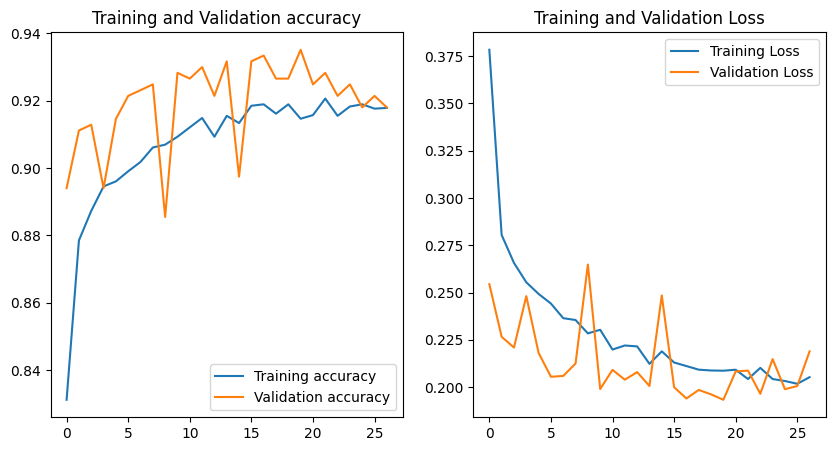

,loss,auc,recall,accuracy
Train,0.202962,0.967393,0.949678,0.921862
Val,0.193944,0.970155,0.957845,0.933333
Diff,-0.009018,0.002763,0.008167,0.011472


------------------------------



In [9]:
# Load datasets using image_dataset_from_directory
height = 64
width = int(height * 1.3675285705588607)
    
train_ds = image_dataset_from_directory(
    directory='data/chest_xray/new_train',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    image_size=(height, width),
    shuffle=True,
    crop_to_aspect_ratio=True,
    seed=42)

val_ds = image_dataset_from_directory(
    directory='data/chest_xray/new_val',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    image_size=(height, width),
    shuffle=True,
    crop_to_aspect_ratio=True,
    seed=42)

train_ds_res = process_dataset(train_ds)
val_ds_res = process_dataset(val_ds)


# Load the ResNet50 model with pretrained weights, but without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 87, 3))

# Make sure the base model's layers are not trainable
for layer in base_model.layers:
    layer.trainable = False

# Create a new Sequential model
resnet_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

resnet_results, resnet_model = modeler(
    resnet_model, file_name = 'resnet_model', file_path= 'saved_models/', optimizer = 'adam',
    train=train_ds_res, val=val_ds_res, num_epochs=50, early_stopping = early_stopping)